In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#https://www.kaggle.com/hritik7080/time-series-forecasting-of-temperature-cnn-lstms

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [5]:
df = pd.read_csv('C:/Users/fu/Downloads/testset.csv')

In [6]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [7]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

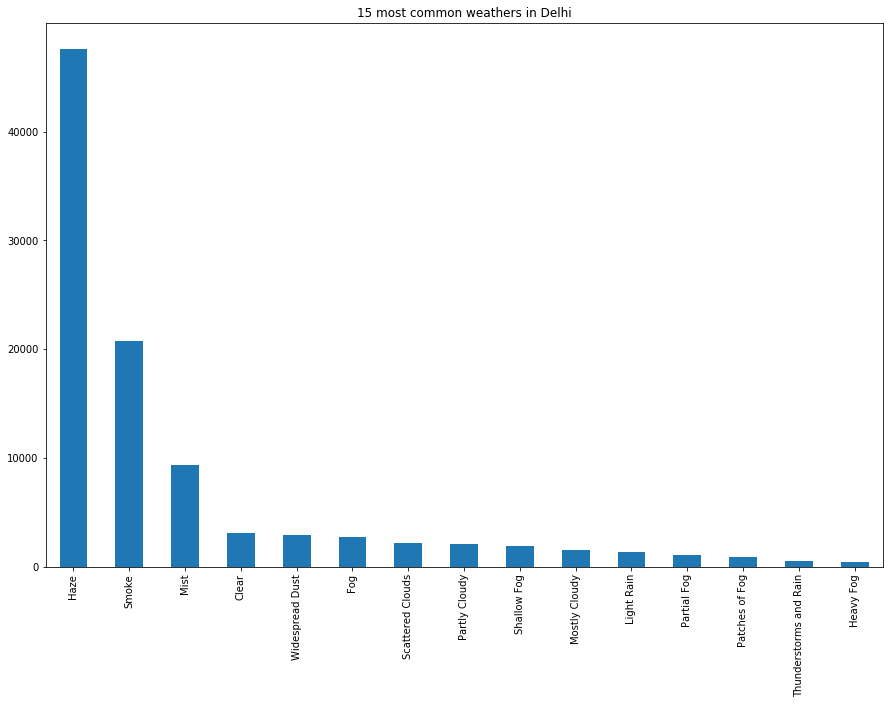

In [8]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Delhi')
plt.show()

[]

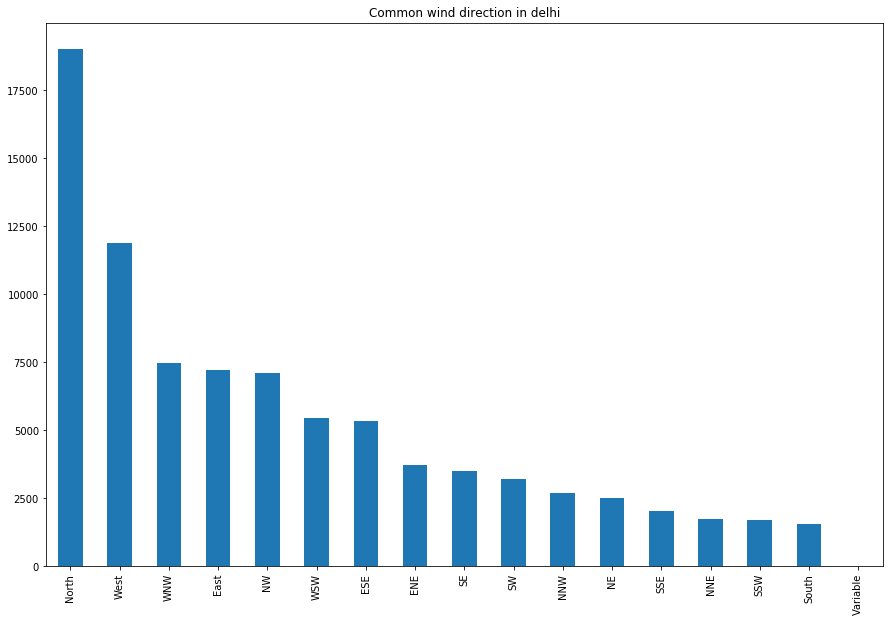

In [9]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

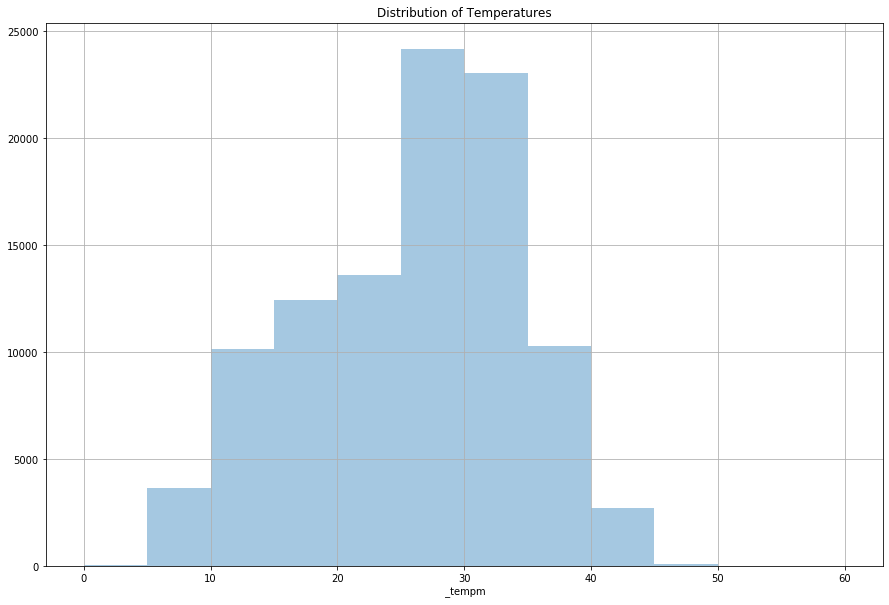

In [12]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [13]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [14]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
5        1996-11-01 17:00:00
6        1996-11-01 18:00:00
7        1996-11-01 19:00:00
8        1996-11-01 20:00:00
9        1996-11-01 21:00:00
10       1996-11-01 22:00:00
11       1996-11-01 23:00:00
12       1996-11-02 00:00:00
13       1996-11-02 01:00:00
14       1996-11-02 02:00:00
15       1996-11-02 03:00:00
16       1996-11-02 04:00:00
17       1996-11-02 05:00:00
18       1996-11-02 06:00:00
19       1996-11-02 07:00:00
20       1996-11-02 08:00:00
21       1996-11-02 09:00:00
22       1996-11-02 10:00:00
23       1996-11-02 11:00:00
24       1996-11-02 12:00:00
25       1996-11-02 13:00:00
26       1996-11-02 14:00:00
27       1996-11-02 15:00:00
28       1996-11-02 16:00:00
29       1996-11-02 17:00:00
                 ...        
100960   2017-04-21 09:00:00
100961   2017-04-21 12:00:00
100962   2017-04-21 15:00:00
100963   2017-

In [15]:
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [16]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()

0

In [ ]:
data=data.values
data = data.astype('float32')

In [17]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [19]:
# a function to extract year part from the whole date
def get_year(x):
    return x[0:4]

In [20]:
# a function to extract month part from the whole date
def get_month(x):
    return x[5:7]

In [21]:
# making two new features year and month
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [22]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
5         1996
6         1996
7         1996
8         1996
9         1996
10        1996
11        1996
12        1996
13        1996
14        1996
15        1996
16        1996
17        1996
18        1996
19        1996
20        1996
21        1996
22        1996
23        1996
24        1996
25        1996
26        1996
27        1996
28        1996
29        1996
          ... 
100960    2017
100961    2017
100962    2017
100963    2017
100964    2017
100965    2017
100966    2017
100967    2017
100968    2017
100969    2017
100970    2017
100971    2017
100972    2017
100973    2017
100974    2017
100975    2017
100976    2017
100977    2017
100978    2017
100979    2017
100980    2017
100981    2017
100982    2017
100983    2017
100984    2017
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [23]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

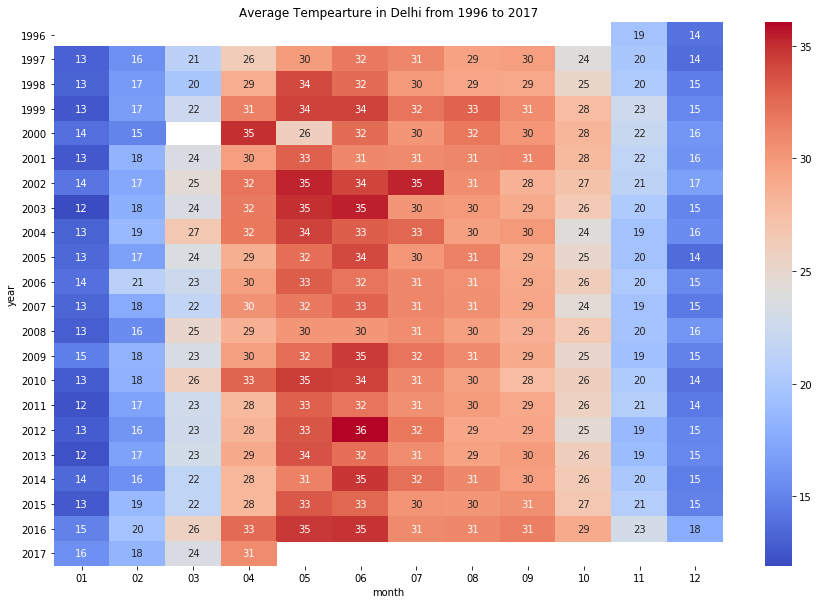

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [25]:
df[' _hum'].isna().sum()

757

In [26]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [27]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

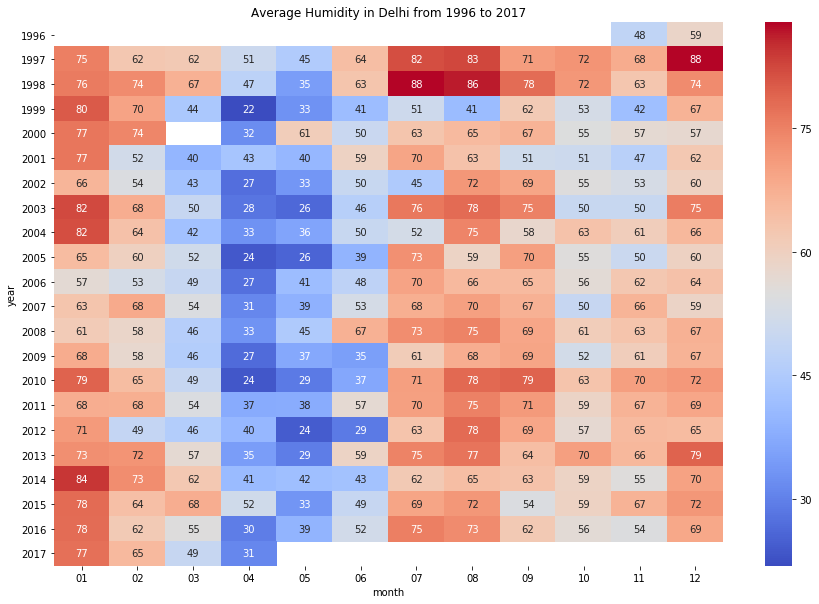

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()

In [29]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [30]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
1996-11-01 17:00:00,21.0
1996-11-01 18:00:00,21.0
1996-11-01 19:00:00,21.0
1996-11-01 20:00:00,19.0


In [31]:
# resampling data with date frequency for time series forecasting
data = data.resample('D').mean()

In [32]:
data.fillna(data['temp'].mean(), inplace=True)

In [33]:
print(data)

                   temp
datetime_utc           
1996-11-01    22.333333
1996-11-02    22.916667
1996-11-03    21.791667
1996-11-04    22.722222
1996-11-05    27.800000
1996-11-06    21.937500
1996-11-07    21.750000
1996-11-08    21.435470
1996-11-09    19.909091
1996-11-10    20.454545
1996-11-11    22.086957
1996-11-12    23.458333
1996-11-13    23.454403
1996-11-14    21.888889
1996-11-15    17.611111
1996-11-16    17.565967
1996-11-17    17.458333
1996-11-18    18.631579
1996-11-19    19.217391
1996-11-20    19.636364
1996-11-21    17.681818
1996-11-22    14.888889
1996-11-23    16.217391
1996-11-24    16.125000
1996-11-25    16.909091
1996-11-26    19.410925
1996-11-27    17.523810
1996-11-28    17.315789
1996-11-29    14.245127
1996-11-30    14.227273
...                 ...
2017-03-26    29.100000
2017-03-27    29.500000
2017-03-28    29.888889
2017-03-29    31.000000
2017-03-30    29.285714
2017-03-31    30.625000
2017-04-01    31.375000
2017-04-02    29.750000
2017-04-03    30

In [34]:
data.temp.isna().sum()

0

In [35]:
data.shape

(7480, 1)

In [36]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
1996-11-06,21.937500
1996-11-07,21.750000
1996-11-08,21.435470
1996-11-09,19.909091


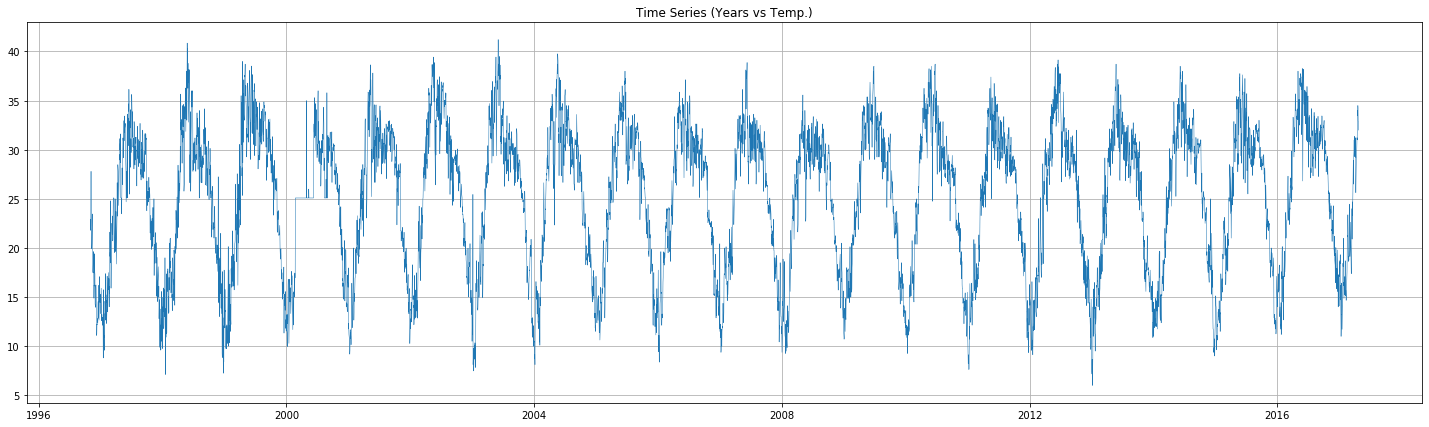

In [37]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [38]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [39]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [40]:
data_scaled.shape

(7480, 1)

In [41]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [42]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [43]:
x_train = inp[:7300,:,:]
x_test = inp[7300:,:,:]    
y_train = out[:7300]    
y_test= out[7300:]

In [44]:
inp.shape

(7450, 30, 1)

In [45]:
x_train.shape

(7300, 30, 1)

In [46]:
x_test.shape

(150, 30, 1)

In [47]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


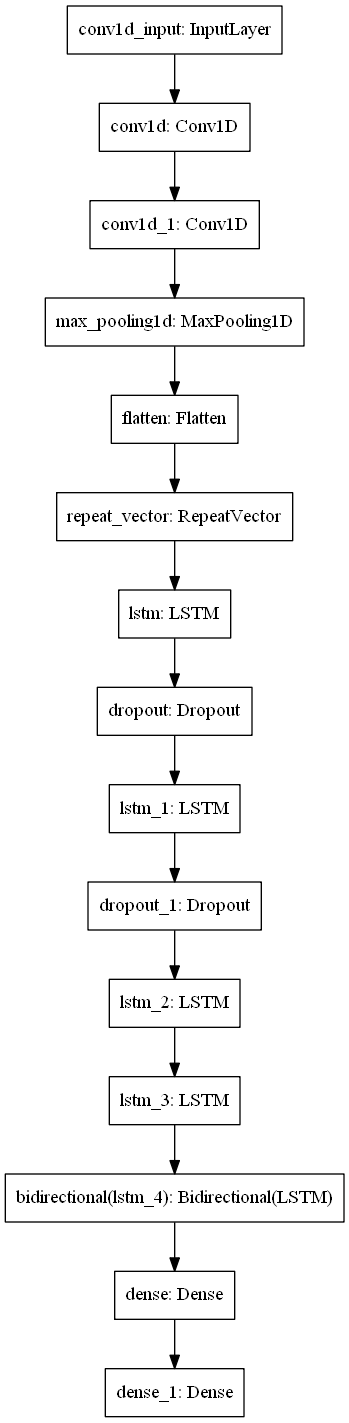

In [48]:
plot_model(model, to_file='model.png')

In [50]:
history = model.fit(x_train,y_train,epochs=10, verbose=1, callbacks = [early_stop] )

Epoch 1/10
7300/7300 [==============================] - 107s 15ms/sample - loss: 0.0124
Epoch 2/10
7300/7300 [==============================] - 107s 15ms/sample - loss: 0.0116
Epoch 3/10
7300/7300 [==============================] - 109s 15ms/sample - loss: 0.0113
Epoch 4/10
7300/7300 [==============================] - 109s 15ms/sample - loss: 0.0107
Epoch 5/10
7300/7300 [==============================] - 108s 15ms/sample - loss: 0.0104
Epoch 6/10
7300/7300 [==============================] - 109s 15ms/sample - loss: 0.0105
Epoch 7/10
7300/7300 [==============================] - 107s 15ms/sample - loss: 0.0099
Epoch 8/10
7300/7300 [==============================] - 110s 15ms/sample - loss: 0.0180
Epoch 9/10
7300/7300 [==============================] - 108s 15ms/sample - loss: 0.0106
Epoch 10/10
7300/7300 [==============================] - 109s 15ms/sample - loss: 0.0103


In [51]:
model.save("./regressor.hdf5")

In [52]:
predict = model.predict(x_test)

In [53]:
predict = scalar.inverse_transform(predict)

In [54]:
Ytesting = scalar.inverse_transform(y_test)

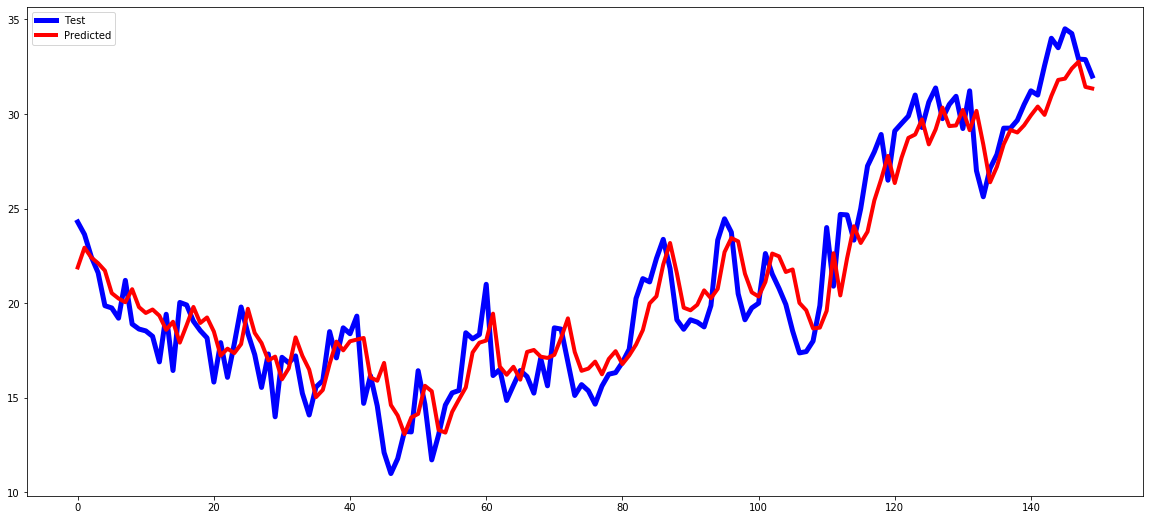

In [55]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()